In [10]:
%pip install geopandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached fonttools-4.39.0-py3-none-any.whl (1.0 MB)
  Using cached Pillow-9.4.0-cp310-cp310-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
pd.options.display.max_columns = None
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona

In [5]:
filename = 'friches_surfaces.gpkg'
gdf = gpd.read_file(filename, driver='GPKG',encoding='utf-8')
print("layer:",fiona.listlayers(filename))
gdf.info()
gdf.head()

layer: ['friches_surfaces_20230303']
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21551 entries, 0 to 21550
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   site_id                        21551 non-null  object             
 1   id_from_file                   21551 non-null  object             
 2   site_nom                       21292 non-null  object             
 3   site_type                      21551 non-null  object             
 4   site_adresse                   315 non-null    object             
 5   site_identif_date              21551 non-null  object             
 6   site_actu_date                 1452 non-null   object             
 7   site_occupation                21551 non-null  object             
 8   site_url                       15816 non-null  object             
 9   site_ademe_url                 0 non-null      fl

,site_id,id_from_file,site_nom,site_type,site_adresse,site_identif_date,site_actu_date,site_occupation,site_url,site_ademe_url,site_securite,site_statut,site_projet_etude,site_projet,site_numero_basias,site_numero_basol,activite_libelle,activite_code,activite_fin_annee,comm_nom,comm_insee,dep,bati_type,bati_nombre,bati_surface,bati_pollution,bati_vacance,bati_patrimoine,bati_etat,local_ancienne_annee,local_recent_annee,date_mutation,proprio_type,proprio_personne,proprio_nom,sol_pollution_annee,sol_pollution_existe,sol_pollution_origine,sol_pollution_commentaire,sol_depollution_fiche,l_idtup,unite_fonciere_surface,site_surface,unite_fonciere_refcad,l_catpro3txt,urba_zone_type,urba_zone_lib,urba_zone_formdomi,urba_doc_type,desserte_distance_route,desserte_distance_ferroviaire,urba_datappro,desserte_distance_fluvial,desserte_distance_maritime,desserte_commentaire,producteur_fk,source_nom,source_producteur,source_contact,source_url,source_r,urba_zone_formdomi_txt,geometry
0,01004_12325,F202,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMBERIEU-EN-BUGEY,01004,01,inconnu,3.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1989-09-04 22:00:00+00:00,1989,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{uf010040003528},3036.80,2489.89,"{01004000BT0003,01004000BT0004,01004000BT0005,...","{""PERSONNE PHYSIQUE""}",U,UBa - Secteur urbain d'intensification de la v...,01,PLU,NaN,NaN,04/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((5.33308 45.95658, 5.33294 45.9..."
1,01004_12327,F60,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,RHA0102039,NaN,NaN,NaN,NaN,AMBERIEU-EN-BUGEY,01004,01,inconnu,2.0,NaN,inconnu,inconnu,inconnu,inconnu,2019-09-29 22:00:00+00:00,2000-08-30 22:00:00+00:00,2000,"{P4a,X1a}","personne physique, personne morale","{_X_,""CTE DE COMMUNES DE LA PLAINE DE L'AIN""}",NaN,inconnu,inconnu,NaN,NaN,"{01004000BT0407,uf010040286707}",15313.43,15800.36,"{01004000BT0407,01004000BT0212,01004000BT0217,...","{INTERCOMMUNALITE,""PERSONNE PHYSIQUE""}",U,UB - Secteur de faubourg,01,PLU,NaN,NaN,04/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((5.33829 45.95671, 5.33839 45.9..."
2,01202_12331,RHA0103984,SARL PETTINI Louis,inconnu,NaN,2022-10-10,NaN,inconnu,https://fiches-risques.brgm.fr/georisques/basi...,NaN,inconnu,inconnu,NaN,NaN,RHA0103984,NaN,NaN,NaN,NaN,LAGNIEU,01202,01,inconnu,0.0,NaN,inconnu,inconnu,inconnu,inconnu,2020-10-22 22:00:00+00:00,2020-10-22 22:00:00+00:00,2020,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{uf012020319446},19980.04,20016.97,"{012020000L1147,012020000L1151,012020000L1152,...","{""PERSONNE PHYSIQUE""}",A,A - zone à vocation agricole,01,PLU,NaN,NaN,06/2019,NaN,NaN,NaN,14,"Friche étude Ademe 2021, intéressante pour du ...",Ademe,NaN,https://www.ecologie.gouv.fr/solaire#scroll-na...,MTE PV,Habitat,"MULTIPOLYGON (((5.30056 45.85190, 5.30031 45.8..."
3,01082_12365,F289,Colonie – MGEN-Hospice de Chanay,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHANAY,01082,01,inconnu,0.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1969-12-31 23:00:00+00:00,1970,{S1a},personne morale,"{""HOSPICES DE CHANAY""}",NaN,inconnu,inconnu,NaN,NaN,{01082000AM0110},598.70,598.70,{01082000AM0110},"{""ETABLISSEMENT HOSPITALIER""}",U,UCb - Centres bourg,01,PLUI,NaN,NaN,12/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((5.78601 46.00416, 5.78578 46.0..."
4,01118_12366,F138,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,RHA0100101,NaN,NaN,NaN,NaN,CORBONOD,01118,01,inconnu,4.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1988-12-31 23:00:00+00:00,1989,{R2a},personne morale,"{""SOCIETE NATIONALE SNCF""}",NaN,inconnu,inconnu,NaN,NaN,{uf011180057566},147720.67,18199.93,"{01118000AB0317,01118000AB0437,01118000AI0029

In [13]:
# 1.Clean data
gdf= gdf.dropna(subset=['proprio_nom'])
gdf= gdf[gdf['date_mutation'].notnull() & (gdf['date_mutation'] >= '1970')]
gdf.head()

,site_id,id_from_file,site_nom,site_type,site_adresse,site_identif_date,site_actu_date,site_occupation,site_url,site_ademe_url,site_securite,site_statut,site_projet_etude,site_projet,site_numero_basias,site_numero_basol,activite_libelle,activite_code,activite_fin_annee,comm_nom,comm_insee,dep,bati_type,bati_nombre,bati_surface,bati_pollution,bati_vacance,bati_patrimoine,bati_etat,local_ancienne_annee,local_recent_annee,date_mutation,proprio_type,proprio_personne,proprio_nom,sol_pollution_annee,sol_pollution_existe,sol_pollution_origine,sol_pollution_commentaire,sol_depollution_fiche,l_idtup,unite_fonciere_surface,site_surface,unite_fonciere_refcad,l_catpro3txt,urba_zone_type,urba_zone_lib,urba_zone_formdomi,urba_doc_type,desserte_distance_route,desserte_distance_ferroviaire,urba_datappro,desserte_distance_fluvial,desserte_distance_maritime,desserte_commentaire,producteur_fk,source_nom,source_producteur,source_contact,source_url,source_r,urba_zone_formdomi_txt,geometry
0,01004_12325,F202,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMBERIEU-EN-BUGEY,01004,01,inconnu,3.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1989-09-04 22:00:00+00:00,1989,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{uf010040003528},3036.80,2489.89,"{01004000BT0003,01004000BT0004,01004000BT0005,...","{""PERSONNE PHYSIQUE""}",U,UBa - Secteur urbain d'intensification de la v...,01,PLU,NaN,NaN,04/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((5.33308 45.95658, 5.33294 45.9..."
1,01004_12327,F60,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,RHA0102039,NaN,NaN,NaN,NaN,AMBERIEU-EN-BUGEY,01004,01,inconnu,2.0,NaN,inconnu,inconnu,inconnu,inconnu,2019-09-29 22:00:00+00:00,2000-08-30 22:00:00+00:00,2000,"{P4a,X1a}","personne physique, personne morale","{_X_,""CTE DE COMMUNES DE LA PLAINE DE L'AIN""}",NaN,inconnu,inconnu,NaN,NaN,"{01004000BT0407,uf010040286707}",15313.43,15800.36,"{01004000BT0407,01004000BT0212,01004000BT0217,...","{INTERCOMMUNALITE,""PERSONNE PHYSIQUE""}",U,UB - Secteur de faubourg,01,PLU,NaN,NaN,04/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((5.33829 45.95671, 5.33839 45.9..."
2,01202_12331,RHA0103984,SARL PETTINI Louis,inconnu,NaN,2022-10-10,NaN,inconnu,https://fiches-risques.brgm.fr/georisques/basi...,NaN,inconnu,inconnu,NaN,NaN,RHA0103984,NaN,NaN,NaN,NaN,LAGNIEU,01202,01,inconnu,0.0,NaN,inconnu,inconnu,inconnu,inconnu,2020-10-22 22:00:00+00:00,2020-10-22 22:00:00+00:00,2020,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{uf012020319446},19980.04,20016.97,"{012020000L1147,012020000L1151,012020000L1152,...","{""PERSONNE PHYSIQUE""}",A,A - zone à vocation agricole,01,PLU,NaN,NaN,06/2019,NaN,NaN,NaN,14,"Friche étude Ademe 2021, intéressante pour du ...",Ademe,NaN,https://www.ecologie.gouv.fr/solaire#scroll-na...,MTE PV,Habitat,"MULTIPOLYGON (((5.30056 45.85190, 5.30031 45.8..."
3,01082_12365,F289,Colonie – MGEN-Hospice de Chanay,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHANAY,01082,01,inconnu,0.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1969-12-31 23:00:00+00:00,1970,{S1a},personne morale,"{""HOSPICES DE CHANAY""}",NaN,inconnu,inconnu,NaN,NaN,{01082000AM0110},598.70,598.70,{01082000AM0110},"{""ETABLISSEMENT HOSPITALIER""}",U,UCb - Centres bourg,01,PLUI,NaN,NaN,12/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((5.78601 46.00416, 5.78578 46.0..."
4,01118_12366,F138,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,RHA0100101,NaN,NaN,NaN,NaN,CORBONOD,01118,01,inconnu,4.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1988-12-31 23:00:00+00:00,1989,{R2a},personne morale,"{""SOCIETE NATIONALE SNCF""}",NaN,inconnu,inconnu,NaN,NaN,{uf011180057566},147720.67,18199.93,"{01118000AB0317,01118000AB0437,01118000AI0029

In [14]:
def get_url(source_url):
    return str(source_url).split('.')[1] if str(source_url)!="nan" else float("nan")
 # 2.Transform and enrich the dataset
gdf = gdf.to_crs(epsg=32630)
gdf['site_adresse']=gdf.centroid
gdf['proprio_nom_flag']= gdf['proprio_nom']=='{_X_}'
gdf['local_ancienne_annee']=pd.to_datetime(gdf['local_ancienne_annee'])
gdf['local_ancienne_annee']=gdf['local_ancienne_annee'].dt.tz_convert('CET').dt.strftime('%Y/%m/%d %H:%M')
gdf['url']=gdf['source_url'].apply(get_url)
gdf= gdf.sort_values(by=['date_mutation','site_nom',], ascending=[False,True])
gdf.head()

,site_id,id_from_file,site_nom,site_type,site_adresse,site_identif_date,site_actu_date,site_occupation,site_url,site_ademe_url,site_securite,site_statut,site_projet_etude,site_projet,site_numero_basias,site_numero_basol,activite_libelle,activite_code,activite_fin_annee,comm_nom,comm_insee,dep,bati_type,bati_nombre,bati_surface,bati_pollution,bati_vacance,bati_patrimoine,bati_etat,local_ancienne_annee,local_recent_annee,date_mutation,proprio_type,proprio_personne,proprio_nom,sol_pollution_annee,sol_pollution_existe,sol_pollution_origine,sol_pollution_commentaire,sol_depollution_fiche,l_idtup,unite_fonciere_surface,site_surface,unite_fonciere_refcad,l_catpro3txt,urba_zone_type,urba_zone_lib,urba_zone_formdomi,urba_doc_type,desserte_distance_route,desserte_distance_ferroviaire,urba_datappro,desserte_distance_fluvial,desserte_distance_maritime,desserte_commentaire,producteur_fk,source_nom,source_producteur,source_contact,source_url,source_r,urba_zone_formdomi_txt,geometry,proprio_nom_flag,url
14384,59014_7716,NPC5905751,"""Le Volet du Nord""",inconnu,POINT (961875.853 5600577.616),2022-10-10,NaN,inconnu,http://fiches-risques.brgm.fr/georisques/basia...,NaN,inconnu,friche potentielle,NaN,NaN,NPC5905751,NaN,Imprégnation du bois ou application de peintur...,NaN,NaN,ANZIN,59014,59,inconnu,1.0,NaN,inconnu,inconnu,inconnu,inconnu,2020/05/29 00:00,2020-05-28 22:00:00+00:00,2020,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{59014000AN0023},440.91,440.91,{59014000AN0023},"{""PERSONNE PHYSIQUE""}",U,UB - Zone urbaine mixte a vocation dominante d...,02,PLUI,NaN,NaN,03/2021,NaN,NaN,NaN,15,Site Basias ou Basol non vérifié par le Cerema,lou dupont,NaN,https://www.data.gouv.fr/fr/datasets/inventair...,MTE,Activité,"MULTIPOLYGON (((961834.089 5600556.313, 961836...",True,data
5644,85019_14012,PAL8500892,"""MEUBLES BUTON""",inconnu,POINT (619090.975 5181650.843),2022-10-10,NaN,inconnu,http://fiches-risques.brgm.fr/georisques/basia...,NaN,inconnu,inconnu,NaN,NaN,PAL8500892,NaN,Fabrication de meubles et matelas,NaN,NaN,BELLEVIGNY,85019,85,inconnu,1.0,NaN,inconnu,inconnu,inconnu,inconnu,2020/02/17 00:00,2020-02-16 23:00:00+00:00,2020,{G1a},personne morale,{ROCH85'IMMO},NaN,inconnu,inconnu,NaN,NaN,{uf850190317948},13131.44,13131.44,"{85019000ZP0049,85019000ZP0050,85019000ZP0052,...","{""SCI - SOCIETE CIVILE IMMOBILIERE""}",A,A - Espace agricole,01,PLUI,NaN,NaN,09/2021,NaN,NaN,NaN,10,Site Basias ou Basol vérifié par le Cerema en ...,Cerema,NaN,https://www.data.gouv.fr/fr/datasets/inventair...,MTE,Habitat,"MULTIPOLYGON (((619055.140 5181616.105, 619077...",False,data
13808,59051_977,NPC5906296,"""Papéterie Le Papier et sa Transformation""",inconnu,POINT (911851.497 5614005.383),2022-10-10,NaN,inconnu,http://fiches-risques.brgm.fr/georisques/basia...,NaN,inconnu,friche potentielle,NaN,NaN,NPC5906296,NaN,Dépôt de liquides inflammables (D.L.I.),NaN,NaN,LA BASSEE,59051,59,inconnu,1.0,NaN,inconnu,inconnu,inconnu,inconnu,2020/07/31 00:00,2020-07-30 22:00:00+00:00,2020,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{uf590510398753},498.73,498.73,"{590510000A0757,590510000A2069}","{""PERSONNE PHYSIQUE""}",U,UAR3.1 - Villes d'appui et villes relais - Tis...,01,PLUI,NaN,NaN,02/2022,NaN,NaN,NaN,15,Site Basias ou Basol non vérifié par le Cerema,lou dupont,NaN,https://www.data.gouv.fr/fr/datasets/inventair...,MTE,Habitat,"MULTIPOLYGON (((911854.007 5613973.473, 911849...",True,data
5850,89025_8394,BOU8900254,"""Pressing du marché""",inconnu,POINT (1020133.993 5282681.560),2022-10-10,NaN,inconnu,http://fiches-risques.brgm.fr/georisques/basia...,NaN,inconnu,inconnu,NaN,NaN,BOU8900254,NaN,"Ennoblissement textile (teinture, impression,...)",NaN,NaN,AVALLON,89025,89,inconnu,1.0,NaN,inconnu,inconnu,inconnu,inconnu,2020/09/21 00:00,2020-09-20 22:00:00+00:00,2020,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{89025000AP0049},223.67,223.67,{89025000AP0049},"{""PERSONNE PHYSIQUE""}",U,UAa - Centres anciens et hameaux denses de l'A...,01,PLU

In [15]:
# 3.Create the Output dataset
gdf_output=gdf[['site_id', 'site_nom', 'date_mutation', 'url', 'proprio_nom_flag', 'local_ancienne_annee', 'sol_pollution_existe']]
gdf_output.to_csv('cartofriches_clean.csv',index=False,encoding='utf_8_sig')

In [12]:
# Data analysis:
filename = 'friches_surfaces.gpkg'
gdf = gpd.read_file(filename, driver='GPKG',encoding='utf-8')
# france is used to get the name of departement
france = gpd.read_file('contour-des-departements.geojson')
cartofriches_mapped = gdf.sjoin(france, how="inner", predicate='intersects')
cartofriches_mapped=cartofriches_mapped.to_crs(epsg=32630)
#calculate area of wasteland
cartofriches_mapped['area']=cartofriches_mapped.area
cartofriches_mapped.head()

,site_id,id_from_file,site_nom,site_type,site_adresse,site_identif_date,site_actu_date,site_occupation,site_url,site_ademe_url,site_securite,site_statut,site_projet_etude,site_projet,site_numero_basias,site_numero_basol,activite_libelle,activite_code,activite_fin_annee,comm_nom,comm_insee,dep,bati_type,bati_nombre,bati_surface,bati_pollution,bati_vacance,bati_patrimoine,bati_etat,local_ancienne_annee,local_recent_annee,date_mutation,proprio_type,proprio_personne,proprio_nom,sol_pollution_annee,sol_pollution_existe,sol_pollution_origine,sol_pollution_commentaire,sol_depollution_fiche,l_idtup,unite_fonciere_surface,site_surface,unite_fonciere_refcad,l_catpro3txt,urba_zone_type,urba_zone_lib,urba_zone_formdomi,urba_doc_type,desserte_distance_route,desserte_distance_ferroviaire,urba_datappro,desserte_distance_fluvial,desserte_distance_maritime,desserte_commentaire,producteur_fk,source_nom,source_producteur,source_contact,source_url,source_r,urba_zone_formdomi_txt,geometry,index_right,code,nom,area
0,01004_12325,F202,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMBERIEU-EN-BUGEY,01004,01,inconnu,3.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1989-09-04 22:00:00+00:00,1989,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{uf010040003528},3036.80,2489.89,"{01004000BT0003,01004000BT0004,01004000BT0005,...","{""PERSONNE PHYSIQUE""}",U,UBa - Secteur urbain d'intensification de la v...,01,PLU,NaN,NaN,04/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((1145674.493 5123091.578, 11456...",0,01,Ain,2518.032576
1,01004_12327,F60,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,RHA0102039,NaN,NaN,NaN,NaN,AMBERIEU-EN-BUGEY,01004,01,inconnu,2.0,NaN,inconnu,inconnu,inconnu,inconnu,2019-09-29 22:00:00+00:00,2000-08-30 22:00:00+00:00,2000,"{P4a,X1a}","personne physique, personne morale","{_X_,""CTE DE COMMUNES DE LA PLAINE DE L'AIN""}",NaN,inconnu,inconnu,NaN,NaN,"{01004000BT0407,uf010040286707}",15313.43,15800.36,"{01004000BT0407,01004000BT0212,01004000BT0217,...","{INTERCOMMUNALITE,""PERSONNE PHYSIQUE""}",U,UB - Secteur de faubourg,01,PLU,NaN,NaN,04/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((1146076.166 5123149.122, 11460...",0,01,Ain,15979.198837
2,01202_12331,RHA0103984,SARL PETTINI Louis,inconnu,NaN,2022-10-10,NaN,inconnu,https://fiches-risques.brgm.fr/georisques/basi...,NaN,inconnu,inconnu,NaN,NaN,RHA0103984,NaN,NaN,NaN,NaN,LAGNIEU,01202,01,inconnu,0.0,NaN,inconnu,inconnu,inconnu,inconnu,2020-10-22 22:00:00+00:00,2020-10-22 22:00:00+00:00,2020,{X1a},personne physique,{_X_},NaN,inconnu,inconnu,NaN,NaN,{uf012020319446},19980.04,20016.97,"{012020000L1147,012020000L1151,012020000L1152,...","{""PERSONNE PHYSIQUE""}",A,A - zone à vocation agricole,01,PLU,NaN,NaN,06/2019,NaN,NaN,NaN,14,"Friche étude Ademe 2021, intéressante pour du ...",Ademe,NaN,https://www.ecologie.gouv.fr/solaire#scroll-na...,MTE PV,Habitat,"MULTIPOLYGON (((1144373.497 5111200.613, 11443...",0,01,Ain,20241.539854
3,01082_12365,F289,Colonie – MGEN-Hospice de Chanay,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHANAY,01082,01,inconnu,0.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1969-12-31 23:00:00+00:00,1970,{S1a},personne morale,"{""HOSPICES DE CHANAY""}",NaN,inconnu,inconnu,NaN,NaN,{01082000AM0110},598.70,598.70,{01082000AM0110},"{""ETABLISSEMENT HOSPITALIER""}",U,UCb - Centres bourg,01,PLUI,NaN,NaN,12/2021,NaN,NaN,NaN,1,DDT de l'Ain,DDT Ain,NaN,NaN,Ain,Habitat,"MULTIPOLYGON (((1180171.160 5132171.917, 11801...",0,01,Ain,606.156095
4,01118_12366,F138,Propriétaire privé,inconnu,NaN,2021-02-01,NaN,inconnu,NaN,NaN,inconnu,inconnu,NaN,NaN,RHA0100101,NaN,NaN,NaN,NaN,CORBONOD,01118,01,inconnu,4.0,NaN,inconnu,inconnu,inconnu,inconnu,1969-12-31 23:00:00+00:00,1988-12-31 23:00:00+00:00,1989,{R2a},personne morale,"{""SOCIETE NATIONALE SNCF""}"

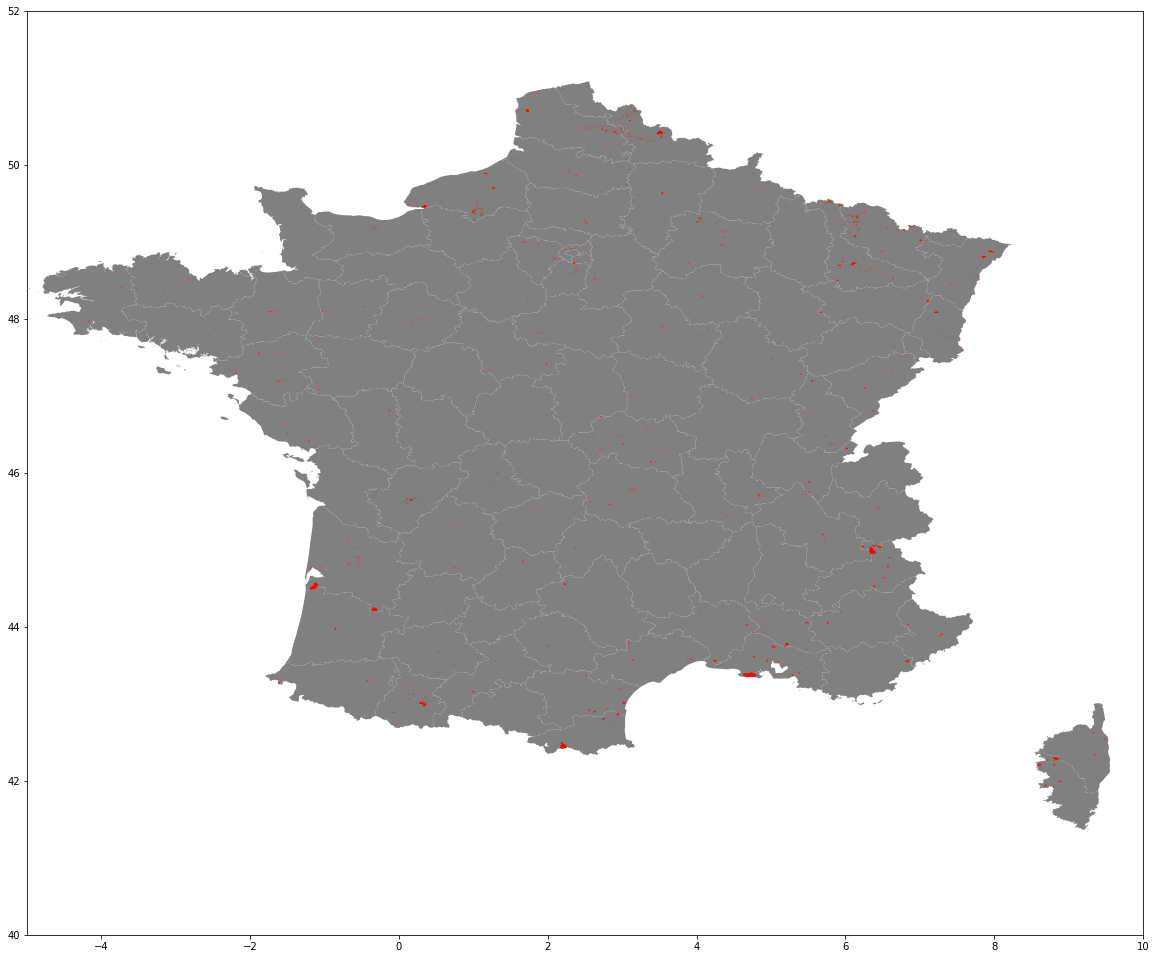

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlim([-5,10])
ax.set_ylim([40,52])
france.plot(ax=ax, color='grey')
gdf.plot(ax=ax, color='red')
plt.show()

In [14]:
# Total area of wastelands in France
total_wasteland_area = cartofriches_mapped['area'].sum()
france=france.to_crs(epsg=32630)
total_france_area = france.geometry.area.sum()
# percentage of wasteland area in France
percentage = (total_wasteland_area / total_france_area) * 100
print("The percentage of wasteland area in France's total land area is:",percentage)

The percentage of wasteland area in France's total land area is: 0.31175985780540694


In [15]:
#top 5 “departments'' with the largest area of wasteland
#As you can see from the above map, the areas with more waste land are located at the French border, probably because people tend to live inland rather than at the border, and the increase in waste land is caused by people moving.
wasteland_area_by_dept = cartofriches_mapped.groupby('nom')['area'].sum().reset_index()
wasteland_area_by_dept = wasteland_area_by_dept.sort_values('area', ascending=False)
wasteland_area_by_dept.head(5)

,nom,area
12,Bouches-du-Rhône,1.067232e+08
33,Gironde,1.003194e+08
42,Hautes-Alpes,8.980763e+07
68,Nord,8.031572e+07
66,Moselle,7.642967e+07


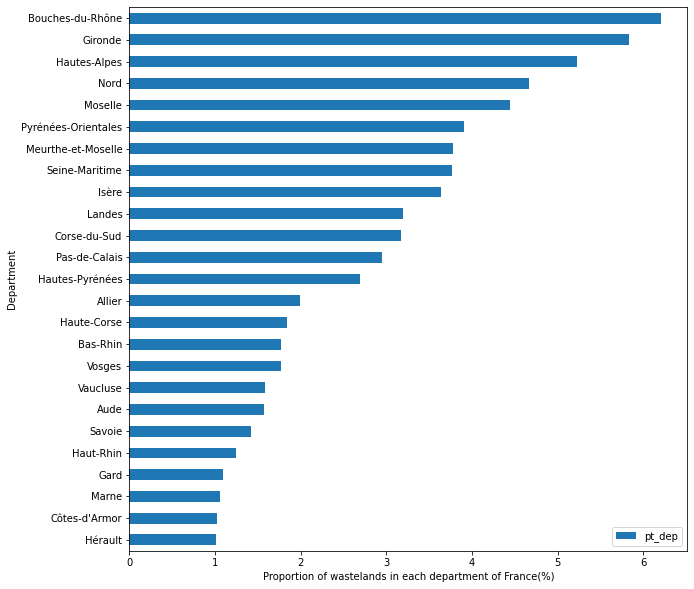

In [16]:
# Proportion of wastelands in each department of France
wasteland_area_by_dept['pt_dep']=wasteland_area_by_dept.apply(lambda x: x['area']/total_wasteland_area*100,axis=1)
wasteland_area_by_dept=wasteland_area_by_dept[wasteland_area_by_dept['pt_dep']>=1]

fig, ax = plt.subplots(figsize=(10, 10))
wasteland_area_by_dept.plot(kind='barh', x='nom', y='pt_dep', ax=ax)
ax.invert_yaxis()
ax.set_xlabel('Proportion of wastelands in each department of France(%)')
ax.set_ylabel('Department')
plt.show()

In [17]:
#Distribution of wasteland by urba type
wasteland_area_by_urba = cartofriches_mapped.groupby('urba_zone_formdomi_txt')['area'].sum().reset_index()
wasteland_area_by_urba  = wasteland_area_by_urba.sort_values('area', ascending=False)
wasteland_area_by_urba['pt_urba']=wasteland_area_by_urba.apply(lambda x: x['area']/total_wasteland_area*100,axis=1)
wasteland_area_by_urba.head(100)

,urba_zone_formdomi_txt,area,pt_urba
1,Habitat,1.050078e+09,61.036696
0,Activité,1.359244e+08,7.900722
2,Loisir et tourisme,1.346996e+07,0.782953
4,PCI,2.669933e+05,0.015519
3,Mixte Habitat / activité,8.377538e+04,0.004870


In [18]:
france = gpd.read_file('contour-des-departements.geojson')
# Rhône Alpes Auvergne Region
region=['01','03','07','15','26','38','42','43','63','69','73','74']
france=france[france['code'].isin(region) ]
gpt_region=gdf[gdf['dep'].isin(region)]

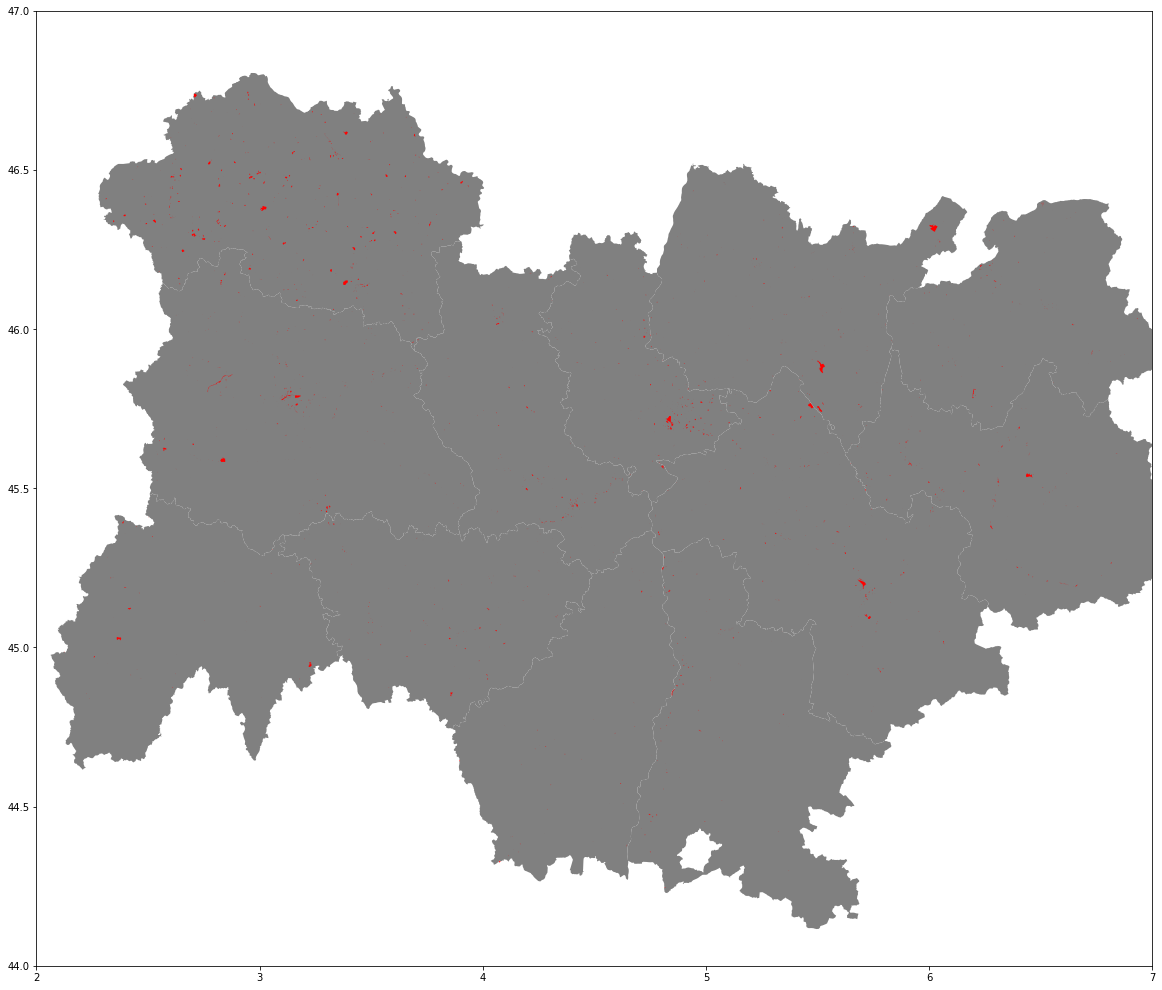

In [19]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlim([2,7])
ax.set_ylim([44,47])
france.plot(ax=ax, color='grey')
gpt_region.plot(ax=ax, color='red')
plt.show()